In [10]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [11]:
prevData = pd.read_csv('master.csv')
prevData.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
# Three attributes taken are country, generation, and sex. The target attribute is suicides_no.

data = prevData[['country', 'generation', 'age', 'year', 'sex', 'suicides_no']]
data = data.astype({'year' : 'str'})
selDimensions = ['country', 'sex', 'age']
data.head()

,country,generation,age,year,sex,suicides_no
0,Albania,Generation X,15-24 years,1987,male,21
1,Albania,Silent,35-54 years,1987,male,16
2,Albania,Generation X,15-24 years,1987,female,14
3,Albania,G.I. Generation,75+ years,1987,male,1
4,Albania,Boomers,25-34 years,1987,male,9


In [13]:
# Get all unique values for the attributes selected

dimensions = [ data[selDimensions[i]].unique().tolist() for i in range(len(selDimensions)) ]
dataCount = [ [] for _ in range(len(selDimensions)) ]

In [14]:
def BUC(input, d, minSupport, file):
    for i in range(d, len(dimensions)):
        dataCount[i] = [ input[input[selDimensions[i]] == val]['suicides_no'].sum() for val in dimensions[i] ] 
        
        for j in range(len(dimensions[i])):
            if(dataCount[i][j] > minSupport):
                file.write('\t'*2*(d+1) + dimensions[i][j] + '  ' + str(dataCount[i][j]) + '\n')
                check = input[selDimensions[i]] == dimensions[i][j]
                BUC(input[check], i + 1, minSupport, file)

In [15]:
# Plot of minSupport vs runTime

minSupport = [ i for i in range(1000, 5000, 500) ]
runTime = []

for i in range(1000, 5000, 500):
    with open('q2_part1.txt', 'w') as file:
        start = time.time()
        file.write('BUC\nTotal:  ' + str(data['suicides_no'].sum()) + '\n')
        BUC(data, 0, i, file)
        end = time.time()
        runTime.append(end - start)

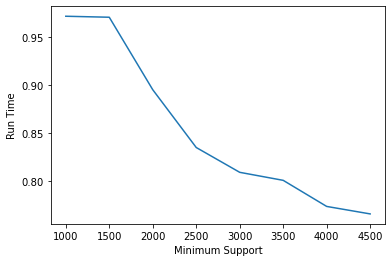

In [16]:
plt.plot(minSupport, runTime)
plt.xlabel('Minimum Support')
plt.ylabel('Run Time')
plt.show()

In [17]:
sr = pd.Series(runTime)
sr.to_csv('runTime.csv', index=False)

In [18]:
selDimensions = ['country', 'generation', 'age', 'year', 'sex']
length = len(selDimensions)

numDimensions = [0]
runTime = []

for name in selDimensions:
    dimensions = []
    for i in range(length):
        dimensions.append(data[selDimensions[i]].unique().tolist())
    dataCount = [ [] for _ in range(length) ]

    with open('q2_part1.txt', 'w') as file:
        start = time.time()
        file.write('BUC\n')
        file.write('ALL\t' + str(data['suicides_no'].sum()) + '\n')
        BUC(data, 0, 1000, file)
        end = time.time()
        runTime.append(end - start)
        numDimensions.append(1 + numDimensions[-1])

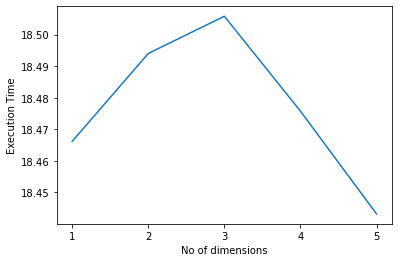

In [19]:
numDimensions.pop(0)
plt.plot(numDimensions, runTime)
plt.xlabel('No of dimensions')
plt.ylabel('Execution Time')
plt.xticks(np.arange(1, 6, 1))
plt.show()